### Setting up dependencies and keys

#### Analysis #1:
Base on the bar charge of the total VADER sentiments of the 5 news outlets, it would seem that the news is mostly negative sentiments.  Big news of the day are the fires in Southern California and the political unrest in Palestine/Israel with Trump recognizing Jerusalem to be the capital of Israel.  Hence the protects and the military buildup along the borders.  All the tweets about wars and fires would cause the sentiments of these outlets to be mostly negative.

#### Analysis #2:
While most outlets are negative, NY Times appear to be overwhelmingly positive.  I would guess that this is because they are not reporting the bad news of the day.  Possibly as a strategy to compete against the other outlets.  While the other outlets are reporting negative news, NYT is probably hoping that with the holidays, people will pay more attention of NYT news outlets for the good news.  This relates to Nash equilibrium, a theory developed by the Nobel Prize winner of Economics.  The theory is basically rationalizing the expected payoff of a decision, in this case, there are 4 news outlets trying to capitalize on bad news, which would result in a division of payoff by 4, whereas the payoff of good news would be owned by one network only (NYT).  Which would make the payoff for good news much more.  Hence, in Economics, it is stated as a 'Nash Equilibrium".

#### Analysis #3:
The scatter plot shows that a majority of the tweets are neutral.  As with most reporting, they generally stay neutral for the most part, or at least they should exhibit some level of impartiality and report just the facts.  But I would be interested in the ad revenues relative to the positive and negative news.  I would maybe run a data collection over time, and chart the movements of the sentiment relative to the viewership/ad revenues.  Maybe there would be a correlation between the news sentiments and revenues.


In [11]:
# Dependencies
import json
import tweepy
import apikeys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Twitter API Keys
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


### Calling Twitter API for tweets by outlets
Setup the target users (news outlet handles) into a list.  Then declared a dictionary to store each of the 100 sentiments into respective news outlet names.  Procede looping through the target users: set the key (target user name) AND set another list to hold all of the tweet sentiment values.  Set up another loop to loop through each page of 20 tweets, total of 5 pages.  Within each page, pull each tweet info, then pull each tweet['text'], analyze via VADER, then append that data to the list holding all of the tweet sentiment values (tweet_text_values).  After all the values from the pages have been analyzed, then the list is stored into the dictionary under the appropriate key holding the outlet agency.  List of values is then cleared again, to be used on the next agency.

In [12]:
target_users = ['nytimes', 'BBCWorld', 'CBSNews', 'CNN', 'FoxNews']

outlet_tweet_dict = {}

for each in target_users:
    outlet_tweet_dict[each] = ""
    tweet_text_values = []
    for page_num in range(5):
    
        public_tweets = api.user_timeline(each, page=page_num)
        #print(json.dumps(public_tweets, sort_keys=True, indent=4))

        for tweet in public_tweets:
            scores = analyzer.polarity_scores(tweet['text'])
            #print(tweet["text"])
            tweet_text_values.append(scores['compound'])
            
    outlet_tweet_dict[each] = tweet_text_values
    #print(len(tweet_texts))
    #print(len(outlet_tweet_dict))
print("Successful")

Successful


In [13]:
# We have a dictionary of lists, so we can now set up a dataframe

outlet_tweet_dict_df = pd.DataFrame(outlet_tweet_dict)
outlet_tweet_dict_df.head()

,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,0.0000,0.4215,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,-0.3582,-0.5106
2,-0.4767,-0.6369,-0.6124,0.6808,0.0000
3,0.0000,0.0000,0.0000,0.3400,0.0000
4,0.0000,0.3612,-0.5423,0.4939,0.7508


In [14]:
# The dataframe created, STARTS AT THE LATEST TWEET, hence when plotted, it will go from recent to past (in index order).
# We need the data to go from past to recent, hence the dataframe MUST be inverted indexing.  So the invert happens after the
# iloc, then the dataframe is reset with a new index to be iterated, and an old index for the labels.

outlet_rev_df = outlet_tweet_dict_df.iloc[::-1].reset_index()
outlet_rev_df.head()

,index,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,99,0.0000,0.0000,0.1779,0.0000,0.6369
1,98,0.0000,0.0000,0.0000,0.4019,0.0000
2,97,-0.7906,-0.2960,0.0000,0.6808,0.4310
3,96,-0.8225,0.2023,0.4939,0.0000,0.4404
4,95,0.0000,-0.5994,-0.3400,0.1027,-0.5423


In [15]:
output = os.path.join('SocialAPI_Complete_List.csv')
outlet_rev_df.to_csv(output, header=True)

# plt.scatter(outlet_rev['index'], outlet_rev['BBCWorld'], marker="o", 
#             facecolors="red", edgecolors="black", alpha=0.95, s=30)

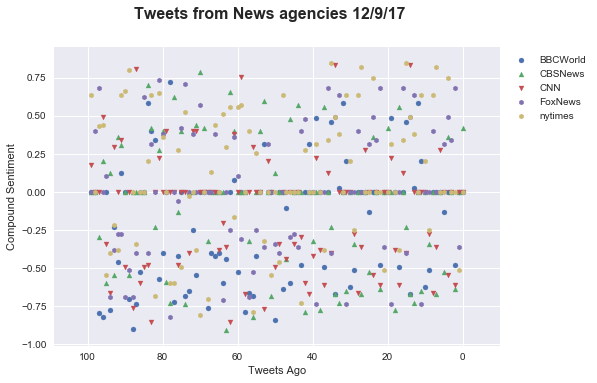

In [22]:
# Setting up the scatter plot using the SAME table.  Using subplots, the chart is defined and stored into a variable 'ax1'
# then the chart ax1 is plotted in reference to each news outlet.

fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Tweets from News agencies 12/9/17", fontsize=16,
             fontweight="bold")

ax1.set_xlim(max(outlet_rev_df['index'])+10, min(outlet_rev_df['index'])-10, 10)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['BBCWorld'], marker="o", s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['CBSNews'], marker='^', s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['CNN'], marker="v", s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['FoxNews'], marker='h', s=25)
ax1.scatter(outlet_rev_df['index'], outlet_rev_df['nytimes'], marker='h', s=25)
ax1.set_ylabel("Compound Sentiment")
ax1.set_xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', ncol=1)
#plt.xticks(range(len(outlet_rev['index'])), outlet_rev['index'])
plt.savefig("SocialAPI_ScatterPlot.png")
plt.show()


### Creating bar chart
A dictionary is creating to store the keys (agency names) and the sum of the sentiments (value).  Later this is used to create a dataframe and ultimately bar graphed.

In [17]:
outlet_compound_total = {}

for outlet in outlet_tweet_dict:
    #Appending list (sum) to dictionary key, so the dictionary key will have an associated list
    outlet_compound_total[outlet] = [sum(outlet_tweet_dict[outlet])]
#print(outlet_compound_total)
#print(outlet_compound_total_list)

In [18]:
outlet_compound_df = pd.DataFrame(outlet_compound_total)
outlet_compound_df

,BBCWorld,CBSNews,CNN,FoxNews,nytimes
0,-18.3135,-8.011,-11.9613,1.0429,10.3099


In [19]:
# Need to transpose the data (turning columns to rows), otherwise, numpy will lump all of the news agencies into the
# one label (the 0 index, as the one label).  Index is then reset, so a dataseries can be created using
# outlet_compound_df['Outlets']

outlet_compound_trans = outlet_compound_df.transpose().rename(columns={0:"Compound Sentiment Total"}).reset_index().rename(columns={"index":"Outlets"})
outlet_compound_trans

,Outlets,Compound Sentiment Total
0,BBCWorld,-18.3135
1,CBSNews,-8.0110
2,CNN,-11.9613
3,FoxNews,1.0429
4,nytimes,10.3099


In [20]:
output = os.path.join('SocialAPI_BarDF.csv')
outlet_compound_trans.to_csv(output, header=True)

# outlet_bar_chart = outlet_compound_trans.plot(kind="bar", color=["b","g",'r'])
# outlet_bar_chart.set_title("Outlet Compound Sentiment Totals")
# outlet_bar_chart.set_xlabel("News Outlets")
# outlet_bar_chart.set_ylabel("Compound Sentiment Totals")
# plt.show()

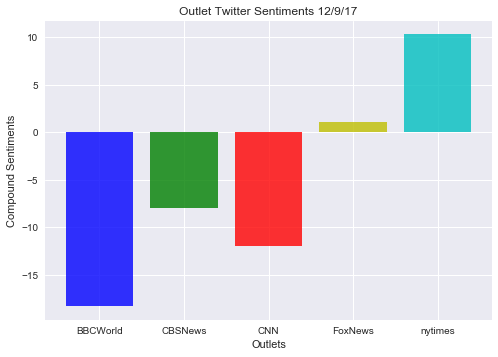

In [23]:

x_values = np.arange(len(target_users))
y_values = outlet_compound_trans['Compound Sentiment Total']
plt.bar(x_values, y_values, color='b''g''r''y''c', alpha=.8, tick_label=outlet_compound_trans['Outlets'])
plt.title("Outlet Twitter Sentiments 12/9/17")
plt.xlabel("Outlets")
plt.ylabel("Compound Sentiments")
plt.savefig("SocialAPI_BarPlot.png")
plt.show()